In [108]:
from sklearn.preprocessing import  OneHotEncoder, LabelEncoder
import numpy as np
import pandas as pd

# 결측치 대체, Label_encoding등 컬럼에 대한 전처리 클래스
class Preprocessing:
    # 컬럼들 안의 이상 값들
    na_values = ['$', '#VALUE!', '##', 'XNA', '@', '#', 'x', '&']
    # float데이터 인데, object로 되어있는 이상 컬럼들
    columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Score_Source_3', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days']

    def __init__(self):
        onehot_encoder = OneHotEncoder()
        label_encoder = LabelEncoder()

        # csv파일 불러오는 과정 na_values안에 포함된 것들은 결측치로 대체
        self.__pay_df = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv', na_values=self.na_values, encoding='utf-8', engine='python')
        # columns에 object로 되어있는 컬럼들을 float으로 변경
        for column in self.columns:
            self.__pay_df[column] = pd.to_numeric(self.__pay_df[column], errors='coerce')
        # target data 분리
        self.__y_target = self.__pay_df['Default']
        del self.__pay_df['Default']

    # 결측치를 어떻게 할 것인가
    def missing_value(self, what='mean'):
        # object인 column들(카테고리)만 뽑기
        category_columns = self.__pay_df.select_dtypes(include='object').columns
        # object가 아닌 column들(연속형)만 뽑기
        numerical_value = self.__pay_df.select_dtypes(exclude='object').columns
        
        if what == 'mean':
            # 연속형 데이터의 평균값으로 결측치 대체
            for column in numerical_value:
                self.__pay_df[column] = self.__pay_df[column].fillna(self.__pay_df[column].mean())
        # TODO:추가적으로 대체할 것들 추가하기!   
        elif what == 'None':
            pass

    # data를 리턴하는 함수
    def get_df(self):
        return self.__pay_df
    
    # target_df를 리턴하는 함수
    def get_target_df(self):
        return self.__y_target

In [109]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()
from Preprocessing import Preprocessing

In [50]:
# test data load (test data는 정답 컬럼 존재 x)
# test_df = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Test_Dataset.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_11464\1196103036.py:2: DtypeWarning: Columns (7,8,16,17,18,19,20,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Test_Dataset.csv')


In [110]:
preprocessing_db = Preprocessing()

In [111]:
preprocessing_db.__init__()

In [112]:
preprocessing_db.missing_value()

In [113]:
# train_df load 
pay_df = preprocessing_db.get_df()

In [114]:
# targer_df load 
target_df = preprocessing_db.get_target_df()

In [115]:
pay_df.head(10)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
0,12142509,6750.0,0.0,0.0,1.0,0.00000,0.0,61190.55,3416.85,Alone,...,17.0000,Yes,Yes,Self-employed,0.568066,0.478787,0.511180,0.018600,63.000000,1.891082
1,12138936,20250.0,1.0,0.0,1.0,0.69206,0.0,15282.00,1826.55,Alone,...,10.0000,Yes,Yes,Government,0.563360,0.215068,0.511180,0.117428,962.106056,1.891082
2,12181264,18000.0,0.0,0.0,1.0,0.00000,1.0,59527.35,2788.20,Alone,...,12.0631,Yes,Yes,Self-employed,0.501213,0.552795,0.329655,0.074200,277.000000,0.000000
3,12188929,15750.0,0.0,0.0,1.0,1.00000,0.0,53870.40,2295.45,Alone,...,15.0000,Yes,Yes,NaN,0.501213,0.135182,0.631355,0.117428,1700.000000,3.000000
4,12133385,33750.0,1.0,0.0,1.0,0.00000,2.0,133988.40,3547.35,Alone,...,12.0631,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.202100,674.000000,1.000000
5,12191614,11250.0,0.0,1.0,1.0,1.00000,1.0,13752.00,653.85,Alone,...,10.0000,Yes,Yes,Other,0.501213,0.697928,0.420611,0.063900,739.000000,0.000000
6,12128086,15750.0,1.0,1.0,0.0,1.00000,0.0,128835.00,3779.55,Alone,...,14.0000,Yes,Yes,NaN,0.729913,0.602545,0.511892,0.204100,0.000000,3.000000
7,12215264,13500.0,0.0,0.0,1.0,1.00000,0.0,60415.20,3097.80,Alone,...,15.0000,Yes,Yes,NaN,0.711468,0.657508,0.549597,0.117428,1687.000000,4.000000
8,12159147,13500.0,1.0,1.0,0.0,1.00000,1.0,45000.00,1200.15,Relative,...,13.0000,Yes,Yes,Self-employed,0.475727,0.637594,0.553165,0.167000,1611.000000,0.000000
9,12130547,12150.0,0.0,0.0,0.0,1.00000,0.0,16320.15,1294.65,Alone,...,9.0000,Yes,Yes,NaN,0.682285,0.063343,0.080650,0.117428,533.000000,5.000000


<AxesSubplot:>

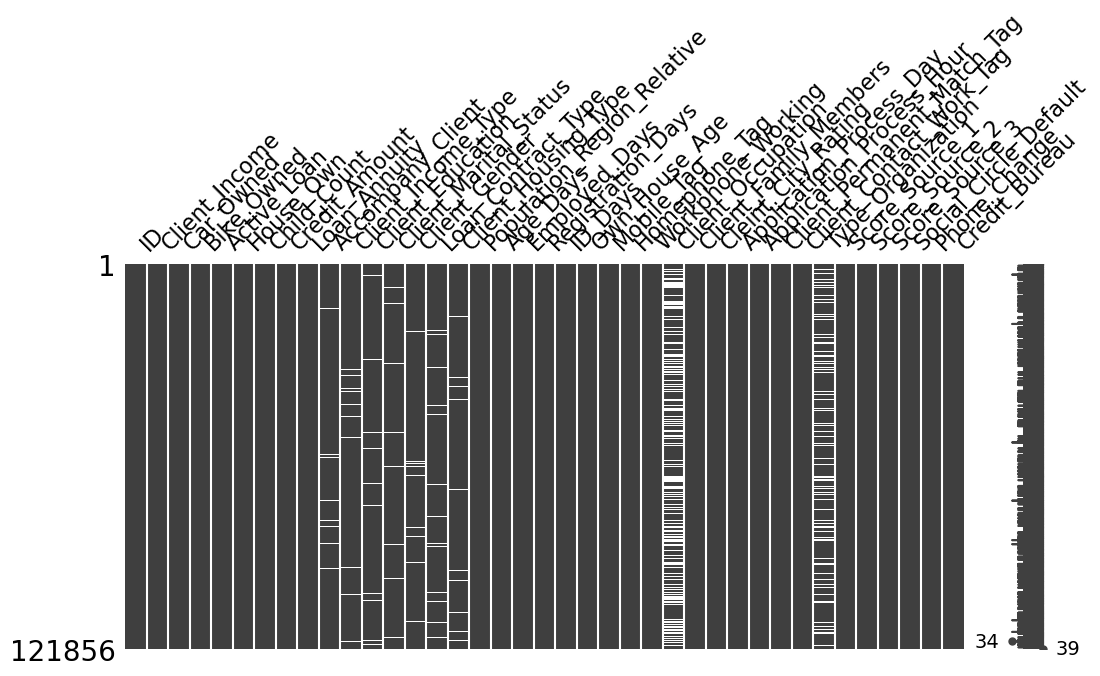

In [37]:
import missingno as msno
msno.matrix(pay_df, figsize=(12,5))

In [38]:
pay_df.isna().sum()

ID                                0
Client_Income                     0
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                       0
Credit_Amount                     0
Loan_Annuity                      0
Accompany_Client               1758
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2416
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative        0
Age_Days                          0
Employed_Days                     0
Registration_Days                 0
ID_Days                           0
Own_House_Age                     0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members             0
Cleint_City_Rating          

In [41]:
pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               121856 non-null  float64
 2   Car_Owned                   121856 non-null  float64
 3   Bike_Owned                  121856 non-null  float64
 4   Active_Loan                 121856 non-null  float64
 5   House_Own                   121856 non-null  float64
 6   Child_Count                 121856 non-null  float64
 7   Credit_Amount               121856 non-null  float64
 8   Loan_Annuity                121856 non-null  float64
 9   Accompany_Client            120098 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [69]:
cag_colums = pay_df.select_dtypes(include='object').columns

In [70]:
cag_colums

Index(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Client_Occupation',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization'],
      dtype='object')

In [71]:
train_df = pd.get_dummies(pay_df, columns = cag_colums)

In [72]:
# 식별 컬럼 제거 (고객 ID)
train_df.drop('ID', axis=1, inplace=True)

In [74]:
pd.set_option('display.max_rows', None)
train_df.isna().sum()

Client_Income                               0
Car_Owned                                   0
Bike_Owned                                  0
Active_Loan                                 0
House_Own                                   0
Child_Count                                 0
Credit_Amount                               0
Loan_Annuity                                0
Population_Region_Relative                  0
Age_Days                                    0
Employed_Days                               0
Registration_Days                           0
ID_Days                                     0
Own_House_Age                               0
Mobile_Tag                                  0
Homephone_Tag                               0
Workphone_Working                           0
Client_Family_Members                       0
Cleint_City_Rating                          0
Application_Process_Day                     0
Application_Process_Hour                    0
Score_Source_1                    

In [81]:
sc = preprocessing.StandardScaler() # Apply standard scaling on x_data (Standardization)
x_data = sc.fit_transform(train_df)

print(x_data.shape) 
print(target_df.shape) 

(121856, 139)
(121856,)


In [82]:
from sklearn import model_selection

In [83]:
train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, target_df,
                                                                                 test_size=0.3,
                                                                                 random_state=0)


(85299, 139)
(36557, 139)
(85299,)
(36557,)


In [87]:
# y data one-hot vector
from tensorflow.keras import utils

train_label = utils.to_categorical(train_label) # 0 or 1 -> one-hot vector
test_label = utils.to_categorical(test_label) 

print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(85299, 139)
(36557, 139)
(85299, 2)
(36557, 2)


## Build & Train the model 

In [84]:
import tensorflow as tf

# tf.keras 에 필요한 함수들이 모여있습니다.
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [85]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [101]:
# 도화지 열기 
model = models.Sequential() 

# 레이어 쌓기 
# 첫 번째 hidden layer 
model.add(layers.Dense(input_dim=139, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
# Batch Normalization 쓸 때 선형결합 후 Batch Normalization 적용 후 activation 씌웠으므로 위 단계에선 
# activation = None 
# 해 초기화는 쓰든 안 쓰든 무방 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu')) 

# 두 번째 hidden layer
model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu')) 

# 세 번째 hidden layer
model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu')) 

# 네 번째 hidden layer
model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.2))

# BatchNormalization은 모든 레이어에서 써야함 
# 하지만 drop out의 경우는 레이어가 여러개이면, 마지막 한 두개의 히든 레이어에서만 써주는 편 (성능이 안 나올 때 사용)

# 마지막 output layer 
model.add(layers.Dense(units=2, activation='softmax')) # 정답 데이터 열의 수 2개 

In [102]:
# complie 단계에서 cost 및 성능지표 지정 
model.compile(optimizer=optimizers.Adam(), # Please try the Adam-optimizer
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy])

In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               35840     
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)              

#### Train the model

In [93]:
# droupout 추가 전 train
history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2)

Epoch 1/15
683/683 [==============================] - 4s 5ms/step - loss: 0.2272 - categorical_accuracy: 0.9225 - val_loss: 0.2649 - val_categorical_accuracy: 0.9206
Epoch 2/15
683/683 [==============================] - 4s 6ms/step - loss: 0.2229 - categorical_accuracy: 0.9241 - val_loss: 0.2690 - val_categorical_accuracy: 0.9147
Epoch 3/15
683/683 [==============================] - 5s 8ms/step - loss: 0.2193 - categorical_accuracy: 0.9242 - val_loss: 0.2705 - val_categorical_accuracy: 0.9189
Epoch 4/15
683/683 [==============================] - 5s 8ms/step - loss: 0.2139 - categorical_accuracy: 0.9259 - val_loss: 0.2773 - val_categorical_accuracy: 0.9185
Epoch 5/15
683/683 [==============================] - 6s 8ms/step - loss: 0.2103 - categorical_accuracy: 0.9267 - val_loss: 0.2797 - val_categorical_accuracy: 0.9149
Epoch 6/15
683/683 [==============================] - 6s 9ms/step - loss: 0.2041 - categorical_accuracy: 0.9282 - val_loss: 0.2834 - val_categorical_accuracy: 0.9128
Epoc

In [104]:
# droupout 추가 후 train
history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2)

Epoch 1/15
683/683 [==============================] - 4s 6ms/step - loss: 0.3036 - categorical_accuracy: 0.9068 - val_loss: 0.2587 - val_categorical_accuracy: 0.9223
Epoch 2/15
683/683 [==============================] - 4s 6ms/step - loss: 0.2658 - categorical_accuracy: 0.9186 - val_loss: 0.2586 - val_categorical_accuracy: 0.9207
Epoch 3/15
683/683 [==============================] - 6s 8ms/step - loss: 0.2600 - categorical_accuracy: 0.9185 - val_loss: 0.2587 - val_categorical_accuracy: 0.9208
Epoch 4/15
683/683 [==============================] - 6s 8ms/step - loss: 0.2582 - categorical_accuracy: 0.9188 - val_loss: 0.2510 - val_categorical_accuracy: 0.9223
Epoch 5/15
683/683 [==============================] - 6s 8ms/step - loss: 0.2546 - categorical_accuracy: 0.9191 - val_loss: 0.2583 - val_categorical_accuracy: 0.9224
Epoch 6/15
683/683 [==============================] - 6s 9ms/step - loss: 0.2542 - categorical_accuracy: 0.9187 - val_loss: 0.2515 - val_categorical_accuracy: 0.9224
Epoc

#### =>  해당 결과에서 loss 및 categorical_accuracy은 train data를 대상으로 학습한 결과이며 val_loss 및 val_categorical_accuracy는 epoch가 끝났을 때 validation data를 대상으로 채점한 결과 

#### => 따라서 epoch를 반복했을 때 validation 기준 error값이 낮아지고 accuracy가 높아짐

#### => 이때 val_loss가 갑자기 낮아지면 overfiting 되기 시작하는 것 

#### => 현재 categorical_accuracy가 계속 높아지는 반면 val_categorical_accuracy는 올라가다가 어느시점 살짝 내려가기도 하며 왔다 갔다하는 것을 보아 overfiting이 발생하고 있음을 알 수 있음

### Test the model

In [94]:
# droupout 추가 전 걀과
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])
# test data 기준 정확도

366/366 [==============================] - 1s 2ms/step - loss: 0.3808 - categorical_accuracy: 0.9032
loss (cross-entropy) : 0.38075950741767883
test accuracy : 0.9032469987869263


In [105]:
# droupout 추가 후 결과
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])
# test data 기준 정확도

366/366 [==============================] - 1s 2ms/step - loss: 0.2664 - categorical_accuracy: 0.9175
loss (cross-entropy) : 0.2663668394088745
test accuracy : 0.9175260663032532


### Visualize the result

In [95]:
history

In [96]:
history.history

{'loss': [0.22723513841629028,
  0.2228834331035614,
  0.21929699182510376,
  0.21393859386444092,
  0.21028193831443787,
  0.20407380163669586,
  0.19930706918239594,
  0.19350074231624603,
  0.1885061115026474,
  0.1812620759010315,
  0.17614790797233582,
  0.17087025940418243,
  0.1643022745847702,
  0.15881885588169098,
  0.15341056883335114],
 'categorical_accuracy': [0.922507643699646,
  0.9240610003471375,
  0.9242222309112549,
  0.9258928298950195,
  0.9266841411590576,
  0.9282374978065491,
  0.9293659329414368,
  0.9315640330314636,
  0.933381199836731,
  0.9355940222740173,
  0.9366344809532166,
  0.9379826784133911,
  0.9411040544509888,
  0.9424669146537781,
  0.9440056085586548],
 'val_loss': [0.26488980650901794,
  0.26898863911628723,
  0.27052366733551025,
  0.27729448676109314,
  0.2797137498855591,
  0.28344520926475525,
  0.28350046277046204,
  0.29974570870399475,
  0.3042299449443817,
  0.3046463131904602,
  0.3146580457687378,
  0.3231978118419647,
  0.3357168436

In [97]:
import numpy as np

val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

np.arange(len(acc))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

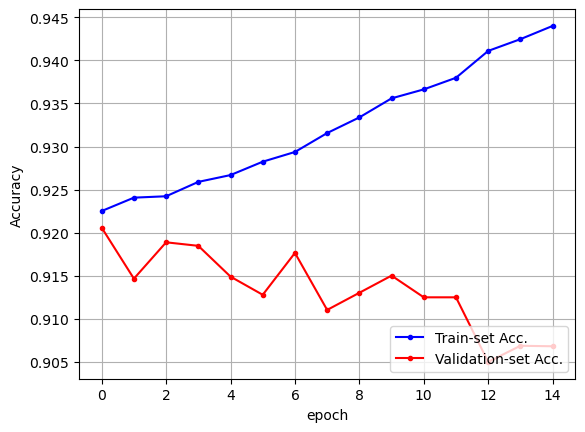

In [100]:
# droupout 추가 전 결과 시각화 
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

import numpy as np
import matplotlib.pyplot as plt

# X 좌표 
x_len = np.arange(len(acc)) # X좌표 0~14까지 형성

# y좌표 training data accuracy와 validation data accuracy 
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.") 
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='lower right') # 범례 위로 올리고 싶으면 upper right
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

#### overfiting .. 

### Preprocessing class 수정 후 다시 작업 

In [190]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
preprocessing_db = Preprocessing()

In [213]:
preprocessing_db = Preprocessing()
# 결측치 제거
preprocessing_db.drop_columns()
# 연속형 데이터 대체
preprocessing_db.numerical_columns_replace()
# 범주형 데이터 대체
preprocessing_db.category_columns_replace()

In [214]:
# train_df & target_df 분리
train_df = preprocessing_db.get_df()
target_df = preprocessing_db.get_target_df()

In [215]:
# 식별 변수 (ID) 제거
train_df.drop('ID', axis=1, inplace=True)

In [216]:
# objects변수 전처리
cag_colums = pay_df.select_dtypes(include='object').columns
train_df = pd.get_dummies(pay_df, columns = cag_colums)

In [217]:
cag_colums = pay_df.select_dtypes(include='object').columns
train_df = pd.get_dummies(pay_df, columns = cag_colums)

In [218]:
train_df.head(10)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,...,Type_Organization_Trade: type 3,Type_Organization_Trade: type 4,Type_Organization_Trade: type 5,Type_Organization_Trade: type 6,Type_Organization_Trade: type 7,Type_Organization_Transport: type 1,Type_Organization_Transport: type 2,Type_Organization_Transport: type 3,Type_Organization_Transport: type 4,Type_Organization_University
0,6750.0,0.0,0.0,1.0,0.00000,0.0,61190.55,3416.85,0.028663,13957.000000,...,0,0,0,0,0,0,0,0,0,0
1,20250.0,1.0,0.0,1.0,0.69206,0.0,15282.00,1826.55,0.008575,14162.000000,...,0,0,0,0,0,0,0,0,0,0
2,18000.0,0.0,0.0,1.0,0.00000,1.0,59527.35,2788.20,0.022800,16790.000000,...,0,0,0,0,0,0,0,0,0,0
3,15750.0,0.0,0.0,1.0,1.00000,0.0,53870.40,2295.45,0.010556,23195.000000,...,0,0,0,0,0,0,0,0,0,0
4,33750.0,1.0,0.0,1.0,0.00000,2.0,133988.40,3547.35,0.020713,11366.000000,...,0,0,0,0,0,0,0,0,0,0
5,11250.0,0.0,1.0,1.0,1.00000,1.0,13752.00,653.85,0.019101,13881.000000,...,0,0,0,0,0,0,0,0,0,0
6,15750.0,1.0,1.0,0.0,1.00000,0.0,128835.00,3779.55,0.016612,21323.000000,...,0,0,0,0,0,0,0,0,0,0
7,13500.0,0.0,0.0,1.0,1.00000,0.0,60415.20,3097.80,0.009175,22493.000000,...,0,0,0,0,0,0,0,0,0,0
8,13500.0,1.0,1.0,0.0,1.00000,1.0,45000.00,1200.15,0.006008,16027.422948,...,0,0,0,0,0,0,0,0,0,0
9,12150.0,0.0,0.0,0.0,1.00000,0.0,16320.15,1294.65,0.016612,20507.000000,...,0,0,0,0,0,0,0,0,0,0


In [222]:
train_df.to_csv('train_df.csv', index=False, header=True)
target_df.to_csv('target_df.csv', index=False, header=True)

In [225]:
# sc = preprocessing.StandardScaler() # Apply standard scaling on x_data (Standardization)
# x_data = sc.fit_transform(train_df)

# print(x_data.shape) 
# print(target_df.shape)

(121856, 139)
(121856,)


In [226]:
# # train & test set split 
# train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, target_df,
#                                                                                   stratify = target_df,
#                                                                                   test_size=0.2,
#                                                                                   random_state=42)